In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import taxopy

In [79]:
df = pd.read_csv('data/report.Neige_2_3.txt', sep='\t', header=None)
df

,0,1,2,3,4,5
0,24.71,6769450,6769450,U,0,unclassified
1,75.29,20626790,5482,R,1,root
2,75.24,20612604,23206,R1,131567,cellular organisms
3,64.78,17746608,2581,R2,2759,Eukaryota
4,64.73,17734691,0,R3,33154,Opisthokonta
...,...,...,...,...,...,...
20512,0.00,5,0,O,1511857,Ligamenvirales
20513,0.00,5,0,F,157897,Rudiviridae
20514,0.00,5,0,G,2842391,Azorudivirus
20515,0.00,5,0,S,2843747,Azorudivirus SRV


In [96]:
df[5] = df[5].str.replace(' ', '')

In [97]:
unclassified = df.iloc[0][0]
filtered_df = df[(df[3].isin(["R2", "U"])) & (df[0] > 0)]

In [ ]:
# Remove the row where column 5 is "Eukaryota"
filtered_df = filtered_df[filtered_df[5] != "Eukaryota"]

# Add rows where column 5 is "Canis lupus familiaris", "Ursus arctos" or "Homo sapiens"
new_rows = df[df[5].isin([
    "Canislupusfamiliaris",
    "Ursusarctos",
    "Homosapiens"])]

filtered_df = pd.concat([filtered_df, new_rows])
filtered_df

,0,1,2,3,4,5
0,24.71,6769450,6769450,U,0,unclassified
229,10.34,2831620,98599,R2,2,Bacteria
17986,0.04,11170,3,R2,2157,Archaea
18882,0.03,7023,7023,R2,28384,othersequences
29,64.39,17639433,17639433,S1,9615,Canislupusfamiliaris
32,0.20,55948,55948,S,9644,Ursusarctos
42,0.05,14515,14515,S,9606,Homosapiens


In [99]:
total_abundance = filtered_df[0].sum()

In [80]:
samples = ["CX113C","CX113E","CX113F","CX113H","CX115H","CX1138","Neige_2_3","Neige_3_2","Neige_4"]
taxa = ["Bear", "Bear", "Wolf", "Wolf", "Bear", "Bear", "Wolf", "Wolf", "Wolf"]

In [81]:
df_all = pd.DataFrame(columns=["unclassified", "Canislupusfamiliaris", "Ursusarctos", "Homosapiens", "Bacteria", "Archaea", "Duplodnaviria","othersequences"])

for i in range(len(samples)):
    df=pd.read_csv(f"./data/report.{samples[i]}.txt", sep='\t', header=None)
    #remove leading spaces
    df[5] = df[5].str.replace(' ', '')
    #keep only superkingdoms
    filtered_df = df[(df[3].isin(["R2", "U"])) & (df[0] > 0)]
    # Remove the row where column 5 is "Eukaryota"
    filtered_df = filtered_df[filtered_df[5] != "Eukaryota"]
    # Add rows where column 5 is "Canis lupus familiaris", "Ursus arctos" or "Homo sapiens"
    new_rows = df[df[5].isin([
        "Canislupusfamiliaris",
        "Ursusarctos",
        "Homosapiens"])]

    filtered_df = pd.concat([filtered_df, new_rows])

    for name in df_all.columns:
        if name in filtered_df[5].values:
            df_all.loc[i, name] = filtered_df[filtered_df[5] == name][0].values[0]
        else:
            df_all.loc[i, name] = 0

df_all

,unclassified,Canislupusfamiliaris,Ursusarctos,Homosapiens,Bacteria,Archaea,Duplodnaviria,othersequences
0,56.39,0.09,0.35,0.04,42.69,0.12,0.01,0.07
1,61.44,0.06,0.52,0.04,37.54,0.15,0.01,0
2,55.23,0.32,0.02,0.03,44.04,0.12,0.01,0
3,53.29,0.09,0.01,0.01,46.13,0.13,0.01,0.1
4,63.21,0.08,0.05,0.05,36.16,0.16,0.01,0.05
5,61.03,0.1,1.38,0.16,36.7,0.15,0.02,0.05
6,24.71,64.39,0.2,0.05,10.34,0.04,0,0.03
7,61.45,0.23,0.02,0.02,37.93,0.1,0.01,0.02
8,51.77,0.11,0.01,0.02,47.73,0.08,0.01,0.08


In [82]:
# Insert a blank row below row 3
df_all.loc[3.5] = [None] * df_all.shape[1]
df_all = df_all.sort_index().reset_index(drop=True)
df_all

,unclassified,Canislupusfamiliaris,Ursusarctos,Homosapiens,Bacteria,Archaea,Duplodnaviria,othersequences
0,56.39,0.09,0.35,0.04,42.69,0.12,0.01,0.07
1,61.44,0.06,0.52,0.04,37.54,0.15,0.01,0
2,55.23,0.32,0.02,0.03,44.04,0.12,0.01,0
3,53.29,0.09,0.01,0.01,46.13,0.13,0.01,0.1
4,None,None,None,None,None,None,None,None
5,63.21,0.08,0.05,0.05,36.16,0.16,0.01,0.05
6,61.03,0.1,1.38,0.16,36.7,0.15,0.02,0.05
7,24.71,64.39,0.2,0.05,10.34,0.04,0,0.03
8,61.45,0.23,0.02,0.02,37.93,0.1,0.01,0.02
9,51.77,0.11,0.01,0.02,47.73,0.08,0.01,0.08


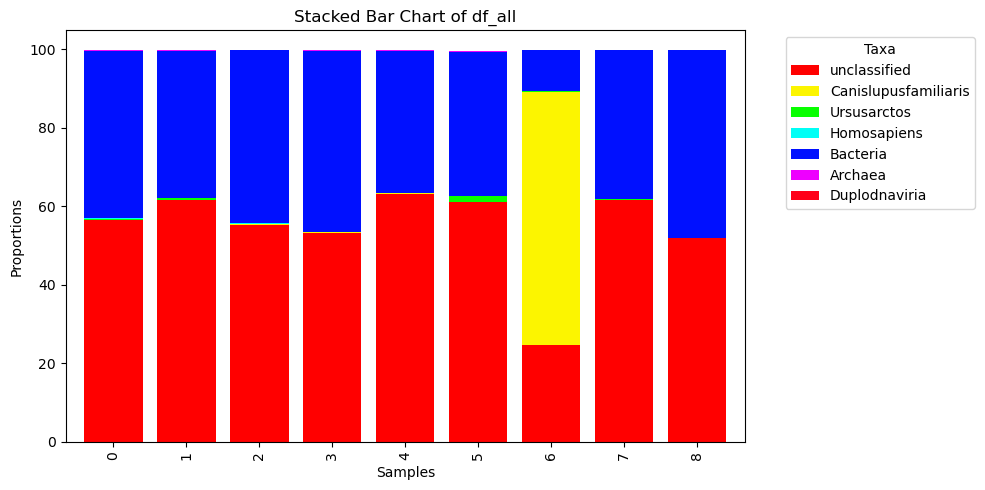

In [8]:
# Adjust the bar width and height
bar_width = 0.8
bar_height = 0.5

# Plot the stacked bar chart with adjusted bar width and height
ax = df_all.plot(kind='bar', stacked=True, figsize=(10, 5), width=bar_width, colormap='hsv')

# Set the labels and title
ax.set_xlabel('Samples')
ax.set_ylabel('Proportions')
ax.set_title('Stacked Bar Chart of df_all')

# Show the legend
ax.legend(title='Taxa', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [45]:
samples_forplot = ["CX113C","CX113E","CX113F","CX113H", "", "CX115H","CX1138","Neige_2_3","Neige_3_2","Neige_4"]

In [83]:
df_all.rename(columns={
    'Canislupusfamiliaris': 'Canis familiaris',
    'Ursusarctos': 'Ursus arctos',
    'Homosapiens': 'Homo sapiens',
    'unclassified': 'Unclassified',
    'othersequences': 'Other sequences'
}, inplace=True)
df_all

,Unclassified,Canis familiaris,Ursus arctos,Homo sapiens,Bacteria,Archaea,Duplodnaviria,Other sequences
0,56.39,0.09,0.35,0.04,42.69,0.12,0.01,0.07
1,61.44,0.06,0.52,0.04,37.54,0.15,0.01,0
2,55.23,0.32,0.02,0.03,44.04,0.12,0.01,0
3,53.29,0.09,0.01,0.01,46.13,0.13,0.01,0.1
4,None,None,None,None,None,None,None,None
5,63.21,0.08,0.05,0.05,36.16,0.16,0.01,0.05
6,61.03,0.1,1.38,0.16,36.7,0.15,0.02,0.05
7,24.71,64.39,0.2,0.05,10.34,0.04,0,0.03
8,61.45,0.23,0.02,0.02,37.93,0.1,0.01,0.02
9,51.77,0.11,0.01,0.02,47.73,0.08,0.01,0.08


In [133]:
colour_dict = {
    'Unclassified': 'darkgray',
    'Canis familiaris': 'steelblue',
    'Ursus arctos': 'indianred',
    'Homo sapiens': 'forestgreen',
    'Bacteria': 'darkorchid',
    'Archaea': 'gold',
    'Duplodnaviria': 'greenyellow',
    'Other sequences': 'black'
}

colour_dict

{'Unclassified': 'darkgray',
 'Canis familiaris': 'steelblue',
 'Ursus arctos': 'indianred',
 'Homo sapiens': 'forestgreen',
 'Bacteria': 'darkorchid',
 'Archaea': 'gold',
 'Duplodnaviria': 'greenyellow',
 'Other sequences': 'black'}

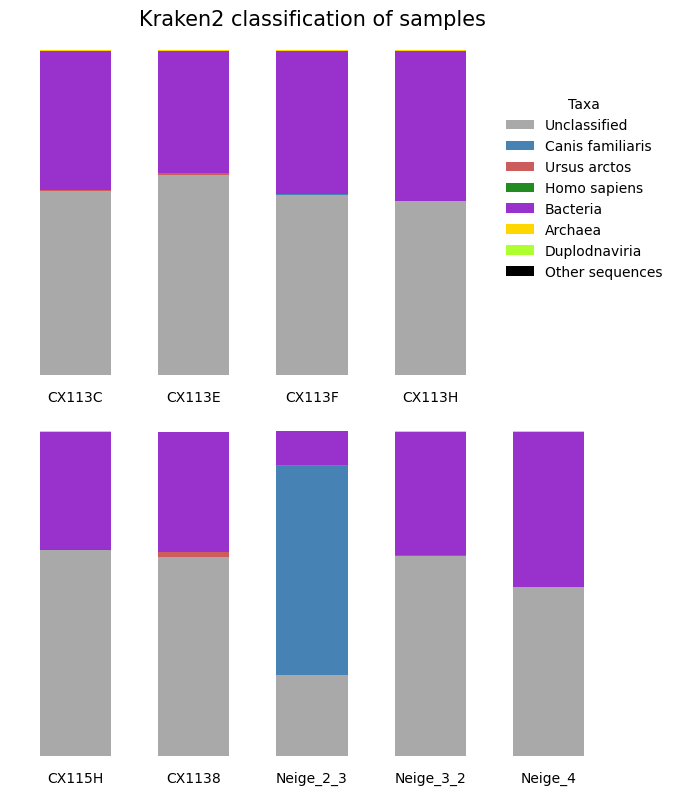

In [134]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 8))
plt.subplots_adjust(hspace=1)
bar_width1 = 0.6

# Plot the first 4 rows of df_all in the top subplot
df_all.iloc[:5].plot(kind='bar', stacked=True, ax=ax[0], width=bar_width1, color=[colour_dict[col] for col in df_all.columns])
ax[0].set_title('Kraken2 classification of samples', size=15)
ax[0].legend(title='Taxa', bbox_to_anchor=(0.8, 0.85), loc='upper left', frameon=False)


# Plot the last 5 rows of df_all in the bottom subplot
df_all.iloc[5:].plot(kind='bar', stacked=True, ax=ax[1], width=bar_width1, color=[colour_dict[col] for col in df_all.columns])
ax[1].legend().remove()

ax[0].axis('off')
ax[1].axis('off')

# Add text below each of the bars in both subplots
for i, rect in enumerate(ax[0].patches[0:5]):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width() / 2., -5, samples_forplot[i], ha='center', va='top')

for i, rect in enumerate(ax[1].patches[0:5]):
    height = rect.get_height()
    ax[1].text(rect.get_x() + rect.get_width() / 2., -5, samples_forplot[i + 5], ha='center', va='top')

# Remove the axes from both plots
# Adjust layout
plt.tight_layout()
plt.savefig('figures/kraken_output.png', dpi=600)
plt.show()

# Plot with controls

In [2]:
samples = ["CX113C","CX113E","CX113F","CX113H","CX115H","CX1138","Neige_2_3","Neige_3_2","Neige_4", "greek_wolf", "slov_bear", "human"]
taxa = ["Bear", "Bear", "Wolf", "Wolf", "Bear", "Bear", "Wolf", "Wolf", "Wolf", "Wolf", "Bear", "Human"]

In [3]:
df_all = pd.DataFrame(columns=["unclassified", "Canislupusfamiliaris", "Ursusarctos", "Homosapiens", "Bacteria", "Archaea", "Duplodnaviria","othersequences"])

for i in range(len(samples)):
    df=pd.read_csv(f"./data/report.{samples[i]}.txt", sep='\t', header=None)
    #remove leading spaces
    df[5] = df[5].str.replace(' ', '')
    #keep only superkingdoms
    filtered_df = df[(df[3].isin(["R2", "U"])) & (df[0] > 0)]
    # Remove the row where column 5 is "Eukaryota"
    filtered_df = filtered_df[filtered_df[5] != "Eukaryota"]
    # Add rows where column 5 is "Canis lupus familiaris", "Ursus arctos" or "Homo sapiens"
    new_rows = df[df[5].isin([
        "Canislupusfamiliaris",
        "Ursusarctos",
        "Homosapiens"])]

    filtered_df = pd.concat([filtered_df, new_rows])

    for name in df_all.columns:
        if name in filtered_df[5].values:
            df_all.loc[i, name] = filtered_df[filtered_df[5] == name][0].values[0]
        else:
            df_all.loc[i, name] = 0

df_all

,unclassified,Canislupusfamiliaris,Ursusarctos,Homosapiens,Bacteria,Archaea,Duplodnaviria,othersequences
0,56.39,0.09,0.35,0.04,42.69,0.12,0.01,0.07
1,61.44,0.06,0.52,0.04,37.54,0.15,0.01,0
2,55.23,0.32,0.02,0.03,44.04,0.12,0.01,0
3,53.29,0.09,0.01,0.01,46.13,0.13,0.01,0.1
4,63.21,0.08,0.05,0.05,36.16,0.16,0.01,0.05
5,61.03,0.1,1.38,0.16,36.7,0.15,0.02,0.05
6,24.71,64.39,0.2,0.05,10.34,0.04,0,0.03
7,61.45,0.23,0.02,0.02,37.93,0.1,0.01,0.02
8,51.77,0.11,0.01,0.02,47.73,0.08,0.01,0.08
9,0.97,98.45,0.26,0.11,0.05,0,0,0


In [4]:
colour_dict = {
    'Unclassified': 'darkgray',
    'Canis familiaris': 'steelblue',
    'Ursus arctos': 'indianred',
    'Homo sapiens': 'forestgreen',
    'Bacteria': 'darkorchid',
    'Archaea': 'gold',
    'Duplodnaviria': 'greenyellow',
    'Other sequences': 'black'
}

In [5]:
df_all.rename(columns={
    'Canislupusfamiliaris': 'Canis familiaris',
    'Ursusarctos': 'Ursus arctos',
    'Homosapiens': 'Homo sapiens',
    'unclassified': 'Unclassified',
    'othersequences': 'Other sequences'
}, inplace=True)
df_all

,Unclassified,Canis familiaris,Ursus arctos,Homo sapiens,Bacteria,Archaea,Duplodnaviria,Other sequences
0,56.39,0.09,0.35,0.04,42.69,0.12,0.01,0.07
1,61.44,0.06,0.52,0.04,37.54,0.15,0.01,0
2,55.23,0.32,0.02,0.03,44.04,0.12,0.01,0
3,53.29,0.09,0.01,0.01,46.13,0.13,0.01,0.1
4,63.21,0.08,0.05,0.05,36.16,0.16,0.01,0.05
5,61.03,0.1,1.38,0.16,36.7,0.15,0.02,0.05
6,24.71,64.39,0.2,0.05,10.34,0.04,0,0.03
7,61.45,0.23,0.02,0.02,37.93,0.1,0.01,0.02
8,51.77,0.11,0.01,0.02,47.73,0.08,0.01,0.08
9,0.97,98.45,0.26,0.11,0.05,0,0,0


In [6]:
samples_forplot = ["CX113C","CX113E","CX113F","CX113H", "CX115H","CX1138","Neige_2_3","Neige_3_2","Neige_4", "Wolf", "Bear", "Human"]

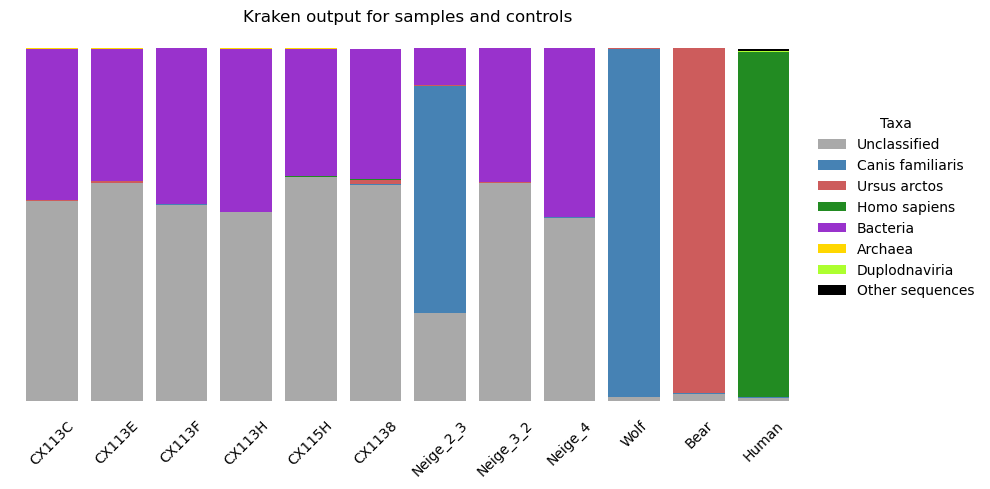

In [7]:
# Adjust the bar width and height
bar_width = 0.8
bar_height = 0.5

# Plot the stacked bar chart with adjusted bar width and height
ax = df_all.plot(kind='bar', stacked=True, figsize=(10, 5), width=bar_width, color=[colour_dict[col] for col in df_all.columns])

# Set the labels and title
ax.set_xlabel('Samples')
ax.set_ylabel('Proportions')
ax.set_title('Kraken output for samples and controls')
ax.axis('off')

# Show the legend
ax.legend(title='Taxa', bbox_to_anchor=(1, 0.8), loc='upper left', frameon=False)


for i, rect in enumerate(ax.patches[0:12]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., -5, samples_forplot[i], ha='center', va='top', rotation=45)

# Show the plot
plt.tight_layout()
plt.savefig('figures/kraken_output_2.png', dpi=600)
plt.show()